# Importing libraries

In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



# Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/school-records/student_academic_guardian.csv')

In [3]:
data

,student_id,student_name,date_of_birth,gender,guardian_id,subjects,course,student_academic_performance_score,guardian_name,relationship,occupation,income_level
0,0,David Ayo,2010-08-10,male,0,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,34.588100,Oreoluwa Ayo,niece,Musician,180000
1,1,Sarah Bamidele,2010-06-25,female,1,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,43.651433,Jamiu Bamidele,father,Dentist,450000
2,2,Mary Olamide,2009-09-04,female,2,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,37.338011,Adebimpe Olamide,mother,Software Developer,350000
3,3,Grace Akuchi,2010-02-01,female,3,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,32.941367,Raheem Akuchi,father,Electrician,70000
4,4,Emmanuel Idowu,2011-09-01,male,4,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.924333,Salimot Idowu,mother,Makeup Artist,80000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Oluwafikayo Oluwaseyi,2010-03-04,female,295,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,42.140278,Lanre Oluwaseyi,father,Data Scientist,400000
296,296,Morounkeji Chidi,2010-01-20,female,296,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,46.786733,Ronke Chidi,niece,Pilot,600000
297,297,Raphael Abiodun,2010-07-07,male,297,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.563067,Ayinde Abiodun,nephew,Baker,80000
298,298,Ibukun Chiemeka,2010-01-14,male,298,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,32.575811,Oyinlola Chiemeka,aunt,Electrician,70000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   student_id                          300 non-null    int64  
 1   student_name                        300 non-null    object 
 2   date_of_birth                       300 non-null    object 
 3   gender                              300 non-null    object 
 4   guardian_id                         300 non-null    int64  
 5   subjects                            300 non-null    object 
 6   course                              300 non-null    object 
 7   student_academic_performance_score  300 non-null    float64
 8   guardian_name                       300 non-null    object 
 9   relationship                        300 non-null    object 
 10  occupation                          300 non-null    object 
 11  income_level                        300 non-n

# Data preprocessing, EDA and features engineering

In [5]:
data['student_academic_performance_score'].describe()

count    300.000000
mean      35.300763
std        3.788763
min       29.224589
25%       32.473036
50%       34.399106
75%       37.734361
max       47.901044
Name: student_academic_performance_score, dtype: float64

In [6]:
def modify_score(scores):
    if 29.2<= scores <= 35.43:
        return scores
    elif 35.43 < scores<= 41.66:
        return scores*1.4
    elif 41.66 < scores<= 47.9:
        return scores * 1.68
    else:
        return scores

In [7]:
#calculating my scores in 100 percent
data['student_academic_performance_score']= data['student_academic_performance_score'].apply(modify_score)

In [8]:
data['student_academic_performance_score'].describe()

count    300.000000
mean      42.055045
std       13.039972
min       29.224589
25%       32.473036
50%       34.399106
75%       52.795466
max       78.723213
Name: student_academic_performance_score, dtype: float64

In [9]:
#convert the dtype to datetime
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors ='coerce')

In [10]:
#calculate the age of students by subtracting it from present year
current_date = pd.Timestamp.now()

# Calculate the difference in days and convert to years by dividing by 365.25
data['Age'] = (current_date - data['date_of_birth']).dt.days // 365.25
data.drop(columns = ['date_of_birth'], inplace=True)

In [11]:
#Checking for unique student id
data['student_id'].nunique()

300

In [12]:
#Checking for unique guardian id
data['guardian_id'].nunique()

300

In [13]:
data.columns

Index(['student_id', 'student_name', 'gender', 'guardian_id', 'subjects',
       'course', 'student_academic_performance_score', 'guardian_name',
       'relationship', 'occupation', 'income_level', 'Age'],
      dtype='object')

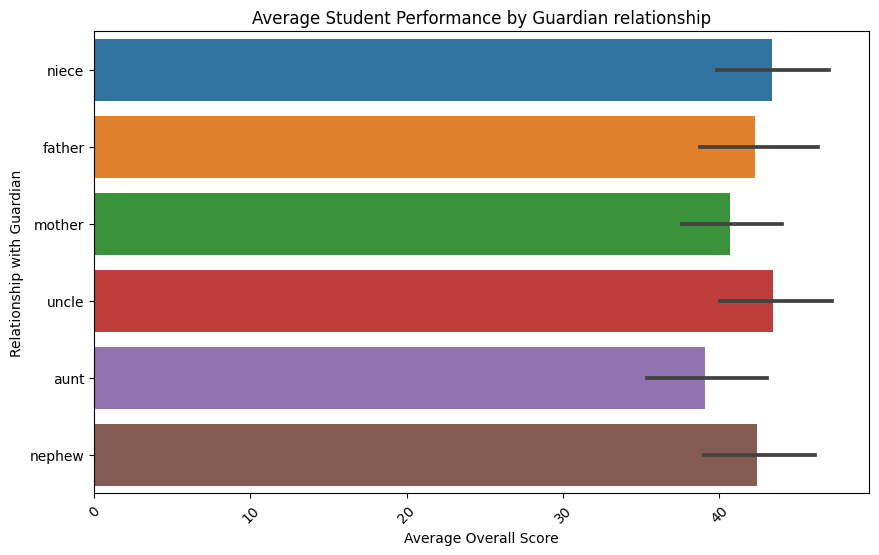

In [14]:
#checking for the relationhip between guardian and students performance
data['relationship'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x='student_academic_performance_score', y='relationship', data=data)
plt.title('Average Student Performance by Guardian relationship')
plt.xlabel('Average Overall Score')
plt.ylabel('Relationship with Guardian')
plt.xticks(rotation=45)
plt.show()


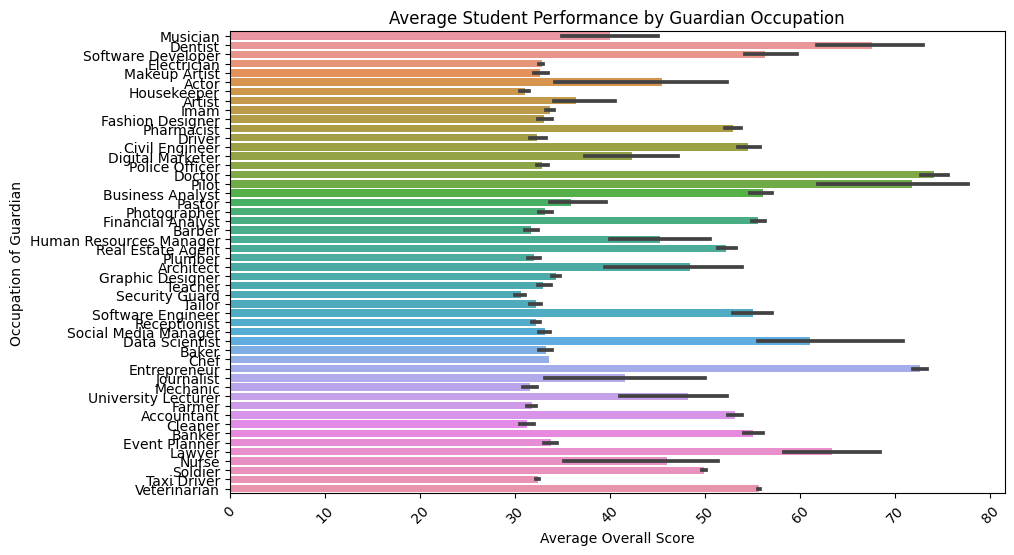

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='student_academic_performance_score', y='occupation',data=data)
plt.title('Average Student Performance by Guardian Occupation')
plt.xlabel('Average Overall Score')
plt.ylabel('Occupation of Guardian')
plt.xticks(rotation=45)
plt.show()

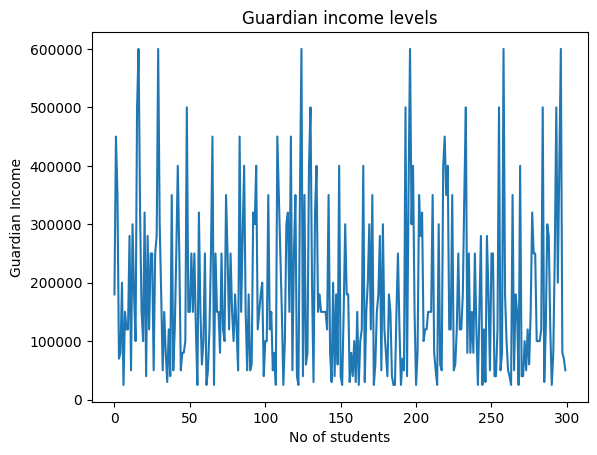

In [16]:
plt.plot(data['income_level'])
plt.title('Guardian income levels')
plt.xlabel('No of students')
plt.ylabel('Guardian Income');

In [17]:
# categorizing income levels into skilled,  unskilled and professional
data['occupation_level'] = pd.cut(data['income_level'], 
                                  bins=[-float('inf'), 100000, 300000, float('inf')], 
                                  labels=['unskilled', 'skilled', 'professional'])

data

,student_id,student_name,gender,guardian_id,subjects,course,student_academic_performance_score,guardian_name,relationship,occupation,income_level,Age,occupation_level
0,0,David Ayo,male,0,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,34.588100,Oreoluwa Ayo,niece,Musician,180000,14.0,skilled
1,1,Sarah Bamidele,female,1,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,73.334408,Jamiu Bamidele,father,Dentist,450000,14.0,professional
2,2,Mary Olamide,female,2,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,52.273216,Adebimpe Olamide,mother,Software Developer,350000,15.0,professional
3,3,Grace Akuchi,female,3,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,32.941367,Raheem Akuchi,father,Electrician,70000,14.0,unskilled
4,4,Emmanuel Idowu,male,4,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.924333,Salimot Idowu,mother,Makeup Artist,80000,13.0,unskilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Oluwafikayo Oluwaseyi,female,295,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,70.795667,Lanre Oluwaseyi,father,Data Scientist,400000,14.0,professional
296,296,Morounkeji Chidi,female,296,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,78.601712,Ronke Chidi,niece,Pilot,600000,14.0,professional
297,297,Raphael Abiodun,male,297,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.563067,Ayinde Abiodun,nephew,Baker,80000,14.0,unskilled
298,298,Ibukun Chiemeka,male,298,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,32.575811,Oyinlola Chiemeka,aunt,Electrician,70000,14.0,unskilled


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


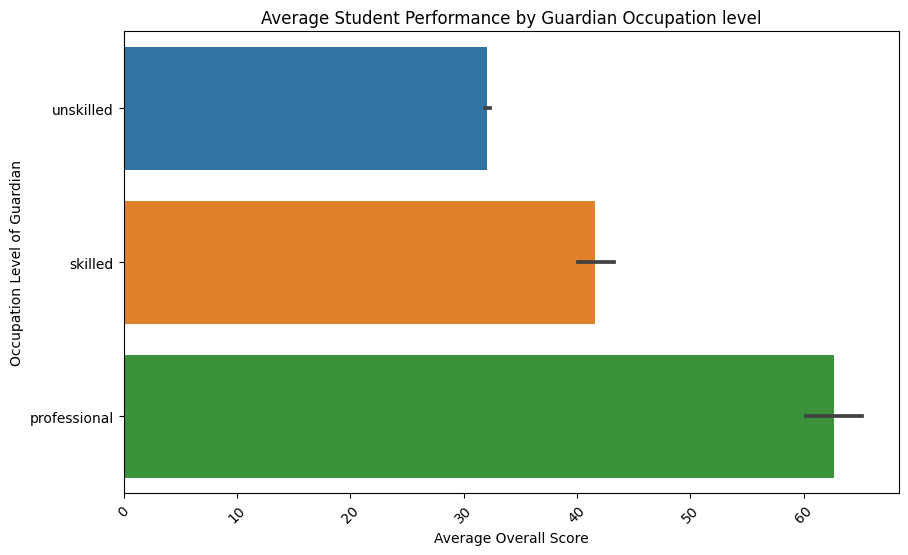

In [18]:
#relationship between occupational level and students performance
plt.figure(figsize=(10, 6))
sns.barplot(x='student_academic_performance_score', y='occupation_level',data=data)
plt.title('Average Student Performance by Guardian Occupation level')
plt.xlabel('Average Overall Score')
plt.ylabel('Occupation Level of Guardian')
plt.xticks(rotation=45)
plt.show()

In [19]:
#checking the age column
data['Age'].value_counts()

Age
13.0    102
14.0     97
15.0     81
12.0     20
Name: count, dtype: int64

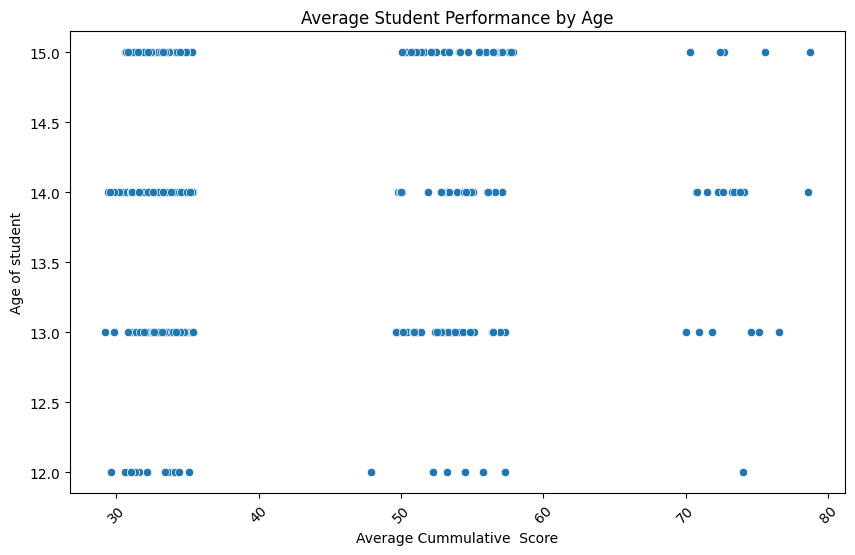

In [20]:
#relationship between  age and students performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='student_academic_performance_score', y='Age',data=data)
plt.title('Average Student Performance by Age')
plt.xlabel('Average Cummulative  Score')
plt.ylabel('Age of student')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Correlation between Age and Academic Score
correlation = data['Age'].corr(data['student_academic_performance_score'])
print(f"Correlation between Age and Academic Score: {correlation}")


Correlation between Age and Academic Score: 0.03299046740893935


In [22]:
data['student_academic_performance_score'].describe()

count    300.000000
mean      42.055045
std       13.039972
min       29.224589
25%       32.473036
50%       34.399106
75%       52.795466
max       78.723213
Name: student_academic_performance_score, dtype: float64

In [23]:
data

,student_id,student_name,gender,guardian_id,subjects,course,student_academic_performance_score,guardian_name,relationship,occupation,income_level,Age,occupation_level
0,0,David Ayo,male,0,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,34.588100,Oreoluwa Ayo,niece,Musician,180000,14.0,skilled
1,1,Sarah Bamidele,female,1,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,73.334408,Jamiu Bamidele,father,Dentist,450000,14.0,professional
2,2,Mary Olamide,female,2,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,52.273216,Adebimpe Olamide,mother,Software Developer,350000,15.0,professional
3,3,Grace Akuchi,female,3,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,32.941367,Raheem Akuchi,father,Electrician,70000,14.0,unskilled
4,4,Emmanuel Idowu,male,4,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.924333,Salimot Idowu,mother,Makeup Artist,80000,13.0,unskilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Oluwafikayo Oluwaseyi,female,295,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,70.795667,Lanre Oluwaseyi,father,Data Scientist,400000,14.0,professional
296,296,Morounkeji Chidi,female,296,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,78.601712,Ronke Chidi,niece,Pilot,600000,14.0,professional
297,297,Raphael Abiodun,male,297,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.563067,Ayinde Abiodun,nephew,Baker,80000,14.0,unskilled
298,298,Ibukun Chiemeka,male,298,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,32.575811,Oyinlola Chiemeka,aunt,Electrician,70000,14.0,unskilled


In [24]:
#create a target column with three classes, pass, average and fail
def classify_score(score):
    if score >= 60:
        return 'pass'
    elif score >= 50:
        return 'average'
    else:
        return 'fail'

data['performance'] = data['student_academic_performance_score'].apply(classify_score)


In [25]:
data

,student_id,student_name,gender,guardian_id,subjects,course,student_academic_performance_score,guardian_name,relationship,occupation,income_level,Age,occupation_level,performance
0,0,David Ayo,male,0,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,34.588100,Oreoluwa Ayo,niece,Musician,180000,14.0,skilled,fail
1,1,Sarah Bamidele,female,1,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,73.334408,Jamiu Bamidele,father,Dentist,450000,14.0,professional,pass
2,2,Mary Olamide,female,2,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,52.273216,Adebimpe Olamide,mother,Software Developer,350000,15.0,professional,average
3,3,Grace Akuchi,female,3,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,32.941367,Raheem Akuchi,father,Electrician,70000,14.0,unskilled,fail
4,4,Emmanuel Idowu,male,4,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.924333,Salimot Idowu,mother,Makeup Artist,80000,13.0,unskilled,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Oluwafikayo Oluwaseyi,female,295,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,70.795667,Lanre Oluwaseyi,father,Data Scientist,400000,14.0,professional,pass
296,296,Morounkeji Chidi,female,296,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",art,78.601712,Ronke Chidi,niece,Pilot,600000,14.0,professional,pass
297,297,Raphael Abiodun,male,297,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,31.563067,Ayinde Abiodun,nephew,Baker,80000,14.0,unskilled,fail
298,298,Ibukun Chiemeka,male,298,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",science,32.575811,Oyinlola Chiemeka,aunt,Electrician,70000,14.0,unskilled,fail


In [26]:
#encoding categorical variables
#ordinal encoding for ordinal faetures

cat_columns = ['performance', 'occupation_level']


# Define custom orders for each column
custom_order = {
    'occupation_level': ['unskilled', 'skilled', 'professional'],  # Custom order for occupation
    'performance': ['fail', 'average', 'pass']  # Custom order for income level
}

# Create an OrdinalEncoder object with custom orders for each column
ordinal_encoder = OrdinalEncoder(categories=[custom_order[col] for col in cat_columns])

# Apply the encoder to the categorical columns
data[cat_columns] = ordinal_encoder.fit_transform(data[cat_columns])


In [27]:

# Applying ordinal encoding to the rest of the columns
categorical_columns = ['gender', 'course', 'relationship']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Apply the encoder to the specified categorical columns
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])


   student_id    student_name  gender  guardian_id  \
0           0       David Ayo     1.0            0   
1           1  Sarah Bamidele     0.0            1   
2           2    Mary Olamide     0.0            2   
3           3    Grace Akuchi     0.0            3   
4           4  Emmanuel Idowu     1.0            4   

                                        subjects  course  \
0  ["23","8","11","24","5","4","13","2","1","6"]     1.0   
1  ["22","21","10","3","6","2","4","13","1","5"]     0.0   
2  ["23","8","11","24","5","4","13","2","1","6"]     1.0   
3  ["22","21","10","3","6","2","4","13","1","5"]     0.0   
4  ["23","8","11","24","5","4","13","2","1","6"]     1.0   

   student_academic_performance_score     guardian_name  relationship  \
0                           34.588100      Oreoluwa Ayo           4.0   
1                           73.334408    Jamiu Bamidele           1.0   
2                           52.273216  Adebimpe Olamide           2.0   
3                     

In [28]:
data

,student_id,student_name,gender,guardian_id,subjects,course,student_academic_performance_score,guardian_name,relationship,occupation,income_level,Age,occupation_level,performance
0,0,David Ayo,1.0,0,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",1.0,34.588100,Oreoluwa Ayo,4.0,Musician,180000,14.0,1.0,0.0
1,1,Sarah Bamidele,0.0,1,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",0.0,73.334408,Jamiu Bamidele,1.0,Dentist,450000,14.0,2.0,2.0
2,2,Mary Olamide,0.0,2,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",1.0,52.273216,Adebimpe Olamide,2.0,Software Developer,350000,15.0,2.0,1.0
3,3,Grace Akuchi,0.0,3,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",0.0,32.941367,Raheem Akuchi,1.0,Electrician,70000,14.0,0.0,0.0
4,4,Emmanuel Idowu,1.0,4,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",1.0,31.924333,Salimot Idowu,2.0,Makeup Artist,80000,13.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Oluwafikayo Oluwaseyi,0.0,295,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",0.0,70.795667,Lanre Oluwaseyi,1.0,Data Scientist,400000,14.0,2.0,2.0
296,296,Morounkeji Chidi,0.0,296,"[""22"",""21"",""10"",""3"",""6"",""2"",""4"",""13"",""1"",""5""]",0.0,78.601712,Ronke Chidi,4.0,Pilot,600000,14.0,2.0,2.0
297,297,Raphael Abiodun,1.0,297,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",1.0,31.563067,Ayinde Abiodun,3.0,Baker,80000,14.0,0.0,0.0
298,298,Ibukun Chiemeka,1.0,298,"[""23"",""8"",""11"",""24"",""5"",""4"",""13"",""2"",""1"",""6""]",1.0,32.575811,Oyinlola Chiemeka,0.0,Electrician,70000,14.0,0.0,0.0


In [34]:
#drop ids and patternless data
data.drop(columns = ['student_id', 'student_name','guardian_id','subjects','guardian_name', 'occupation'], inplace=True)

# Splitting and model development

In [36]:
#creating X and Y columns
target = 'performance'
X = data.drop(columns = [target])
y = data[target]

In [37]:
# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (240, 7)
Test data shape: (60, 7)
Training labels shape: (240,)
Test labels shape: (60,)


## Logistic Regression

In [40]:
# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))



Logistic Regression Accuracy: 0.75


## Random Forest

In [45]:

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


## SVM

In [49]:

# Initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        36
         1.0       0.94      0.80      0.86        20
         2.0       0.57      1.00      0.73         4

    accuracy                           0.92        60
   macro avg       0.83      0.92      0.85        60
weighted avg       0.94      0.92      0.92        60



## XGBOOST

In [51]:
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## KNN CLASSIFIER

In [53]:

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        36
         1.0       1.00      0.90      0.95        20
         2.0       1.00      1.00      1.00         4

    accuracy                           0.97        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Therefore the random forest and the xgboost models are the most accurate models for predicting these students performance

### Feature importance plot

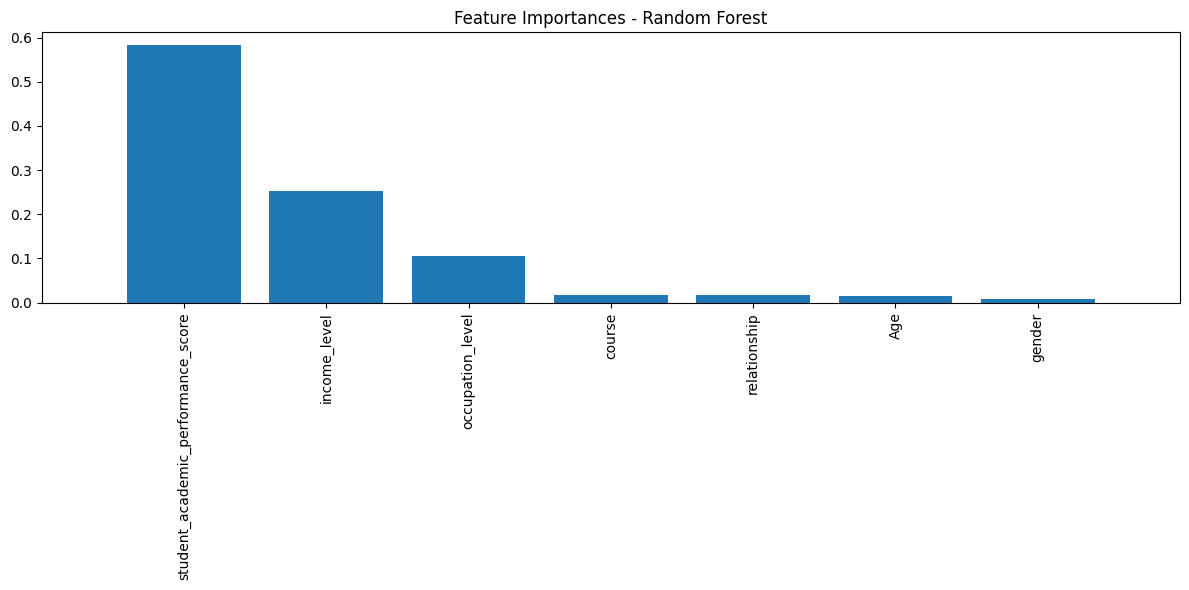

In [54]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


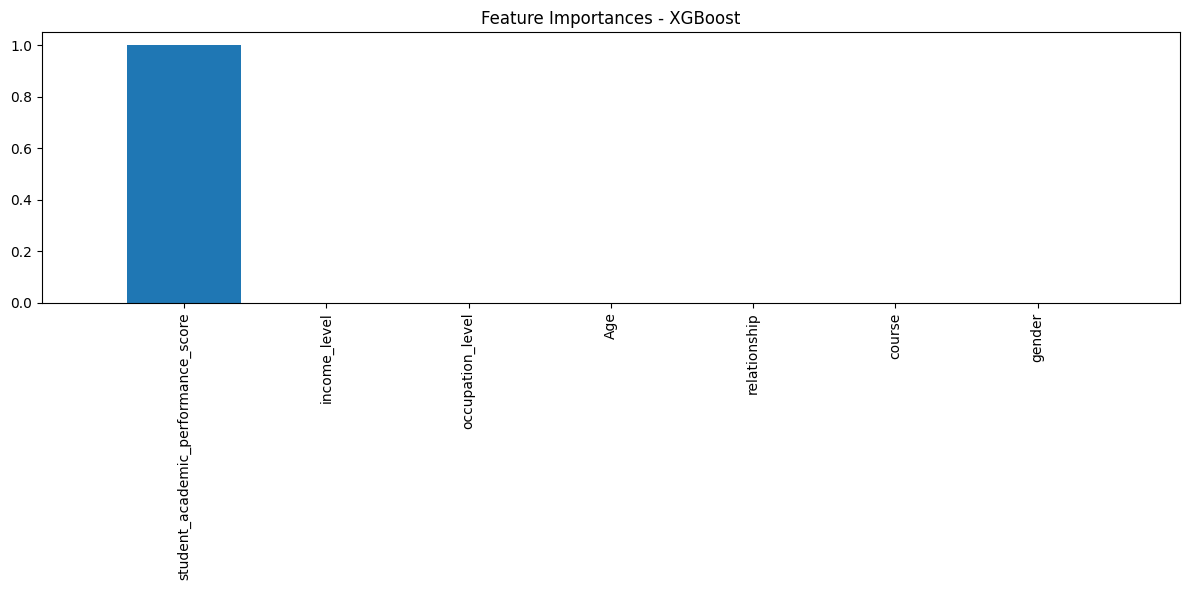

In [55]:
# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Sort feature importances in descending order
xgb_indices = np.argsort(xgb_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances - XGBoost")
plt.bar(range(X_train.shape[1]), xgb_importances[xgb_indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X.columns)[xgb_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


For both the random forest model and the xgboost model the most important features are seen to be the student's aggregate academic score, the income level and the occupation level of the parenta.